# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

# Q1: Is the distribution of body temperatures normal?

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

To answer Q1, let's first look at a the data overall by looking at the data and plotting the distribution.

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.dtypes

temperature    float64
gender          object
heart_rate     float64
dtype: object

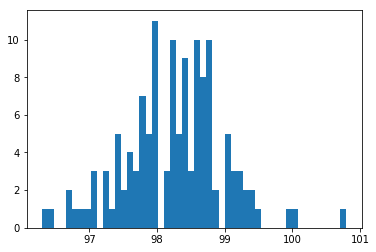

In [5]:
# Histogram of the temperatures to see if it looks somewhat normal
plt.hist(df.temperature, bins=50)
plt.show()

The next step is to check out the CDF of this data and compare it to what a normal distribution's CDF would look like.

In [6]:
# Define a function that computes the ECDF on a 1D array: ecdf()
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF, evenly going from 1/n to n: y
    y = np.arange(1, n+1)/n
    
    return x, y

We will display the theoretical CDF of the normal distribution and compare it with an ECDF of our data by passing the mean and std values from the data.

In [22]:
# Find the mean and standard deviation values of our data
mean_sample = np.mean(df.temperature)
std_sample = np.std(df.temperature)

print(mean_sample)
print(std_sample)

98.24923076923078
0.7303577789050377


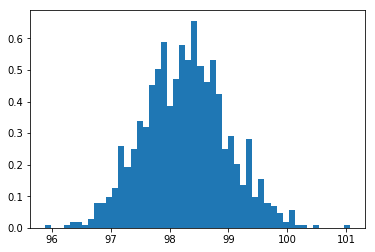

In [23]:
# Create theoretical normal distribution, using previous parameters and a sample size of 1,000. This is what our data should look like if it was truly normal.
np.random.seed(42)

normal = np.random.normal(mean_sample, std_sample, 1000)
plt.hist(x=normal, density=True, bins=50)
plt.show()

In [9]:
# Generate the theoretical ECDF using our parameters from normal
x_theor, y_theor = ecdf(normal)

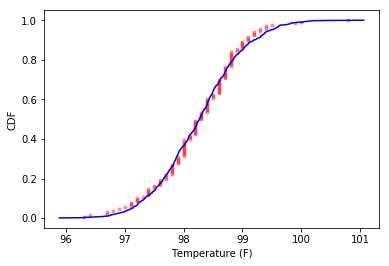

In [10]:
# Take our real data and create an ECDF with it, overlaying it with the theoretical ECDF
x, y = ecdf(df.temperature)

# Overlay our data with the theoretical data ecdf plots
plt.plot(x, y, marker=".", linestyle='none', color='red', alpha=0.35)
plt.plot(x_theor, y_theor, color='blue')
plt.xlabel('Temperature (F)')
plt.ylabel('CDF')
plt.show()

Our sample data seems to follow closely to the theoretical normal distribution's CDF.

Next we will try a Back-of-the-envelope test to see how our standard deviations are spread versus our min and max values.

In [11]:
# Find min and max temperature values
min = df.temperature.min()
max = df.temperature.max()

print(min)
print(max)

96.3
100.8


We need to calculate the z-scores of each to see if it's within 3-4 standard errors of the mean. The z = value ('min' or 'max') - sample mean ('mean_sample') / sample standard deviation ('std_sample').

In [12]:
# Calculate z-scores for min and max
z_min = (min - mean_sample) / std_sample
z_max = (max - mean_sample) / std_sample

print(z_min)
print(z_max)

-2.6688711006174173
3.4924927267747696


The min z-score sits at the -2.6 standard deviation mark, which means that would cover the span up to just above 95% of the range a normal distribution could handle. The max z-score sitting at 3.4 standard deviations from the mean suggests it covers the upper span of a normal distribution and is expected. These values start to get concerning when they do not fit within 3-4 standard deviations of the sample mean.

Conclusion: For being discrete, the data follow a similar ECDF to that of the normal. Our min and max values also fall within the expected range of just under 99.7% of the range we would expect in a normal distribution. For that, we can assume for now that this data is relatively normal and is representative of other samples.

# Q2: Is the sample size large? Are the observations independent?

In order to proceed using the CLT and the tests following that, these two assumptions must be true. Our sample size is 130 observations, which can be assumed is sufficiently large enough. Additionally, the observations should be independent as long as long as the following is true: they are not measured within the same individual, they measured in similar climates (not while it's 120 degrees out, or is the person is ill), and there is no tracable relationship between individuals and their temperatures - for instance if a mother and son have a medical condition where their temperatures are both abnormally high.

Unfortunately, there is no explanation as to how this data was collected, so all we can go off of is the data itself. In dataframes, we can assume that each row is an independent observation and record of an individual, in which case, these observations would have been collected independently.

# Q3: Is the true population mean really 98.6 degrees F?

## Approach 1:  Bootstrap Hypothesis Method

The bootstrap method is to randomly select an observation, store it in an array, and resample with replacement for a determined amount of times. This creates a bootstrap sample. A bootstrap replicate then is a statistic from a bootstrap array. If we create a determined amount of replicates, we can view the distribution of those statistic values and come up with confidence intervals and p-values to test our hypotheses.

Here, we do a bootstrap method because we are comparing our dataset with a value. Our Null hypothesis is that the true mean human body temperature is exactly 98.6 degrees F. We will assume this is true and test to see if our sample data is likely to fit within that assumption.

In [13]:
# Theoretical mean is 98.6 degrees
theor_mean = 98.6

In [14]:
# Shift our data so that the means are the same - this does not affect the variance
sample_shifted = df.temperature - np.mean(df.temperature) + theor_mean

In [15]:
# Determine the difference in the sample observation and write it in a function for later use
def diff_from_theor_mean(data, theor_mean=98.6):
    return np.mean(data) - theor_mean

diff_obs = diff_from_theor_mean(df.temperature)
diff_obs

-0.35076923076921673

In [16]:
# Now we will generate samples and replicates, performed on the shifted data since that is what's in the hypothesis test
# Generate bootstrap sample: bs_sample
np.random.seed(42)
bs_sample = np.random.choice(sample_shifted, size=len(sample_shifted))

In [17]:
# Loop to apply a function to each sample, and collect those values into replicates.
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    
    # Generate replications, where each replicate follows the same form as above in bs_sample
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
        
    return bs_replicates

In [18]:
# Use this function to draw 10,000 samples and calculte the diff from the theoretical mean of each sample
bs_replicates = draw_bs_reps(sample_shifted, diff_from_theor_mean, size=10000)

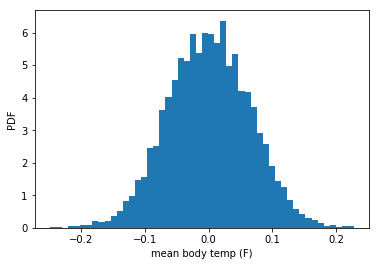

In [19]:
# See how these replicates are distributed
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel('mean body temp (F)')
plt.ylabel('PDF')
plt.show()

In [20]:
bs_replicates

array([ 0.06538462,  0.04384615,  0.09923077, ..., -0.08538462,
        0.00846154,  0.12769231])

In [21]:
# Let's determine a p-value from this test
p = np.sum(bs_replicates <= diff_obs) / 10000
p

0.0

Conclusion: Since the p-value is so extremely low, that means there is a minimal fraction of observations less extreme than the test statistic. This means that it is possible that our observed data was significantly far from the assumed body temperature mean of 98.6 degrees. In other words, we must reject the null hypothesis that the sample data follows a true mean of 98.6 degrees F.

## Approach 2: Frequentist Statistical Sampling